# Test Notebook

## Forward Pass

### Example Dataset

In [1]:
X = [[2.0, 3.0, 5.0, 9.0],
     [1.5, 3.5, 4.5, 8.5],
     [2.5, 3.0, 1.0, 4.0]]

y_sparse = [2, 0, 1]
y_onehot = [[0, 0, 1], [1, 0, 0], [0, 1, 0]]

### Simple Dense Model

In [2]:
from src.layers import Dense, ReLU, Softmax
from src.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

dense1 = Dense(6, n_inputs=4)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=6)
activation2 = Softmax()

loss_function1 = CategoricalCrossentropy()
loss_function2 = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss1 = loss_function1.calculate(y_onehot, activation2.outputs)
loss2 = loss_function2.calculate(y_sparse, activation2.outputs)


### Weights and biases

Parameters after one iteration.

**Dense 1 (6 neurons, 4 inputs)**

In [3]:
dense1.info()

Inputs:
[[2.  3.  5.  9. ]
 [1.5 3.5 4.5 8.5]
 [2.5 3.  1.  4. ]]

Weights:
[[-0.07739881 -0.00063462 -0.08726849 -0.31753773]
 [-0.0480391   0.12408056  0.19778817 -0.06348163]
 [ 0.11193941 -0.00043219  0.07096908  0.09021841]
 [-0.12739633  0.0085202   0.10585082 -0.03875602]
 [ 0.0408168   0.0216328   0.10834018 -0.05614187]
 [-0.05775409 -0.02642711  0.04222608  0.03329985]]

Biases:
[0. 0. 0. 0. 0. 0.]

Outputs:
[[-3.45088349  0.69376968  1.38939333 -0.04878216  0.18295606  0.31603951]
 [-3.21009829  0.71267625  1.25261379 -0.01437129  0.14726491  0.29394004]
 [-1.55282029  0.19600559  0.71039467 -0.3421035   0.0507131  -0.0482411 ]]



**Activation 1 (ReLU)**

In [4]:
activation1.info()

Inputs:
[[-3.45088349  0.69376968  1.38939333 -0.04878216  0.18295606  0.31603951]
 [-3.21009829  0.71267625  1.25261379 -0.01437129  0.14726491  0.29394004]
 [-1.55282029  0.19600559  0.71039467 -0.3421035   0.0507131  -0.0482411 ]]

Outputs:
[[0.         0.69376968 1.38939333 0.         0.18295606 0.31603951]
 [0.         0.71267625 1.25261379 0.         0.14726491 0.29394004]
 [0.         0.19600559 0.71039467 0.         0.0507131  0.        ]]



**Dense 2 (3 neurons, 6 inputs)**

In [5]:
dense2.info()

Inputs:
[[0.         0.69376968 1.38939333 0.         0.18295606 0.31603951]
 [0.         0.71267625 1.25261379 0.         0.14726491 0.29394004]
 [0.         0.19600559 0.71039467 0.         0.0507131  0.        ]]

Weights:
[[ 0.0515916   0.05405312  0.07592911 -0.03493403 -0.07587643 -0.01533358]
 [-0.15098649  0.03930067  0.02095245  0.14155454  0.1912894   0.25607454]
 [ 0.10209508  0.01482547 -0.0004991   0.02763161 -0.00045474  0.08849927]]

Biases:
[0. 0. 0.]

Outputs:
[[0.12426774 0.17230403 0.03747808]
 [0.11795113 0.15769476 0.03588709]
 [0.06068642 0.03228854 0.00252826]]



**Activation 2 (Softmax)**

In [6]:
activation2.info()

Inputs:
[[0.12426774 0.17230403 0.03747808]
 [0.11795113 0.15769476 0.03588709]
 [0.06068642 0.03228854 0.00252826]]

Outputs:
[[0.33714547 0.35373598 0.30911855]
 [0.33763743 0.35132659 0.31103598]
 [0.34299407 0.33339077 0.32361515]]



### Loss

* loss1: CategoricalCrossentropy
* loss2: SparseCategoricalCrossentropy

In [7]:
loss1, loss2

(1.1194176870353225, 1.1194176870353225)

## Visualize datasets

### Spiral Data

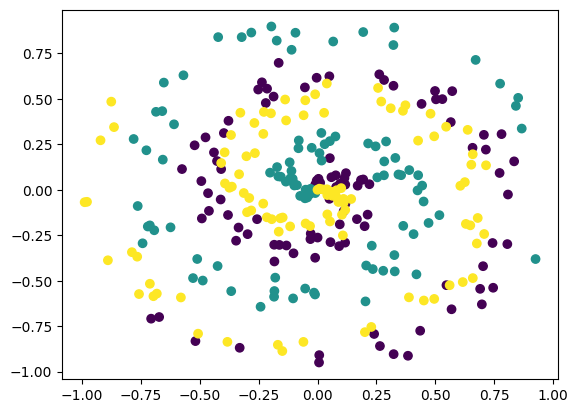

In [8]:
import matplotlib.pyplot as plt
from src.datasets import spiral_data

X, y = spiral_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

### Vertical Data

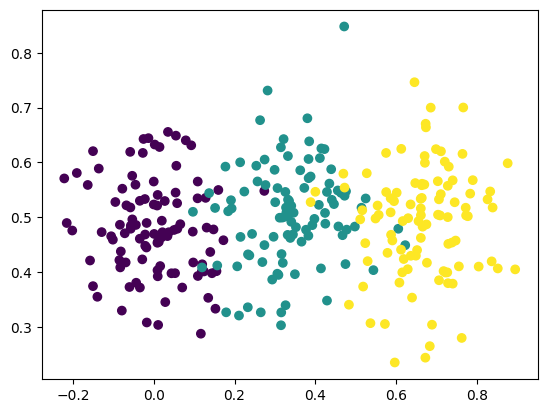

In [9]:
from src.datasets import vertical_data

X, y = vertical_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

## Backward Pass

### Simple Dense Model
One forward and one backward.

In [10]:
import numpy as np

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(4, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=4)
activation2 = Softmax()
loss_function = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
print("loss:", loss)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y)
print("acc:", accuracy)

loss_function.backward(activation2.outputs, y)
activation2.backward(loss_function.dinputs)
dense2.backward(activation2.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

loss: 1.1007306897792457
acc: 0.26666666666666666


### Gradients

Calculated gradients after one iteration.

**Dense 1 Weight Gradient**

In [11]:
dense1.dweights

array([[-0.00235906,  0.00477709],
       [-0.00173075, -0.00241293],
       [ 0.00057556,  0.00335384],
       [-0.00404261,  0.00585797]])

**Dense 1 Bias Gradient**

In [12]:
dense1.dbiases

array([0.01044222, 0.00420769, 0.00226003, 0.00767779])

**Dense 2 Weight Gradient**

In [13]:
dense2.dweights

array([[ 2.57919588e-03, -1.10070426e-03,  8.70658191e-04,
         2.08685222e-03],
       [-3.58672982e-03,  1.13538697e-03, -5.76896303e-04,
        -3.76066917e-03],
       [ 1.00753394e-03, -3.46827105e-05, -2.93761888e-04,
         1.67381696e-03]])

**Dense 2 Bias Gradient**

In [14]:
dense2.dbiases

array([ 0.0038049 , -0.00306439, -0.00074051])

## Optimizing Parameters 

### SGD 

* Learning rate: 1.0
* Decay: 0.0
* Momentum: 0.0
* Epoch: 10000

In [15]:
from src.optimizers import SGD

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD()

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0, acc: 0.343, loss: 1.100, lr: 1.0
epoch: 1000, acc: 0.600, loss: 0.922, lr: 1.0
epoch: 2000, acc: 0.693, loss: 0.679, lr: 1.0
epoch: 3000, acc: 0.747, loss: 0.538, lr: 1.0
epoch: 4000, acc: 0.787, loss: 0.437, lr: 1.0
epoch: 5000, acc: 0.843, loss: 0.371, lr: 1.0
epoch: 6000, acc: 0.870, loss: 0.334, lr: 1.0
epoch: 7000, acc: 0.887, loss: 0.297, lr: 1.0
epoch: 8000, acc: 0.877, loss: 0.286, lr: 1.0
epoch: 9000, acc: 0.907, loss: 0.264, lr: 1.0
epoch: 10000, acc: 0.903, loss: 0.250, lr: 1.0


### SGD 

* Learning rate: 1.0
* **Decay: 0.001**
* Momentum: 0.0
* Epoch: 10000

In [16]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(decay=0.001)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.330, loss: 1.100, lr: 1.0
epoch: 1000, acc: 0.513, loss: 1.007, lr: 0.5002501250625312
epoch: 2000, acc: 0.587, loss: 0.923, lr: 0.33344448149383127
epoch: 3000, acc: 0.643, loss: 0.858, lr: 0.25006251562890724
epoch: 4000, acc: 0.670, loss: 0.805, lr: 0.2000400080016003
epoch: 5000, acc: 0.690, loss: 0.766, lr: 0.16669444907484582
epoch: 6000, acc: 0.707, loss: 0.734, lr: 0.1428775539362766
epoch: 7000, acc: 0.733, loss: 0.696, lr: 0.12501562695336915
epoch: 8000, acc: 0.757, loss: 0.644, lr: 0.11112345816201799
epoch: 9000, acc: 0.763, loss: 0.595, lr: 0.1000100010001
epoch: 10000, acc: 0.777, loss: 0.564, lr: 0.09091735612328393


### SGD 

* Learning rate: 1.0
* **Decay: 0.001**
* **Momentum: 0.9**
* Epoch: 10000

In [17]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(learning_rate=1, decay=0.001, momentum=0.9)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.307, loss: 1.100, lr: 1
epoch: 1000, acc: 0.907, loss: 0.259, lr: 0.5002501250625312
epoch: 2000, acc: 0.920, loss: 0.185, lr: 0.33344448149383127
epoch: 3000, acc: 0.927, loss: 0.169, lr: 0.25006251562890724
epoch: 4000, acc: 0.933, loss: 0.161, lr: 0.2000400080016003
epoch: 5000, acc: 0.937, loss: 0.156, lr: 0.16669444907484582
epoch: 6000, acc: 0.933, loss: 0.152, lr: 0.1428775539362766
epoch: 7000, acc: 0.933, loss: 0.149, lr: 0.12501562695336915
epoch: 8000, acc: 0.933, loss: 0.146, lr: 0.11112345816201799
epoch: 9000, acc: 0.933, loss: 0.144, lr: 0.1000100010001
epoch: 10000, acc: 0.933, loss: 0.142, lr: 0.09091735612328393


### AdaGrad 

* Learning rate: 1.0
* Decay: 0.0
* Epsilon: 1e-7
* Epoch: 10000

In [18]:
from src.optimizers import AdaGrad

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = AdaGrad()
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.353, loss: 1.099, lr: 1.0
epoch: 1000, acc: 0.630, loss: 0.830, lr: 1.0
epoch: 2000, acc: 0.660, loss: 0.740, lr: 1.0
epoch: 3000, acc: 0.680, loss: 0.714, lr: 1.0
epoch: 4000, acc: 0.697, loss: 0.707, lr: 1.0
epoch: 5000, acc: 0.673, loss: 0.700, lr: 1.0
epoch: 6000, acc: 0.703, loss: 0.685, lr: 1.0
epoch: 7000, acc: 0.680, loss: 0.682, lr: 1.0
epoch: 8000, acc: 0.700, loss: 0.665, lr: 1.0
epoch: 9000, acc: 0.703, loss: 0.659, lr: 1.0
epoch: 10000, acc: 0.710, loss: 0.654, lr: 1.0


### RMSProp 

* Learning rate: 0.001
* **Decay: 1e-4**
* Epsilon: 1e-7
* Rho: 0.9
* Epoch: 10000

In [19]:
from src.optimizers import RMSProp

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = RMSProp(decay=1e-4)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.283, loss: 1.098, lr: 0.001
epoch: 1000, acc: 0.590, loss: 0.952, lr: 0.0009091735612328393
epoch: 2000, acc: 0.657, loss: 0.823, lr: 0.0008334027835652972
epoch: 3000, acc: 0.683, loss: 0.728, lr: 0.0007692899453804139
epoch: 4000, acc: 0.710, loss: 0.660, lr: 0.0007143367383384526
epoch: 5000, acc: 0.723, loss: 0.609, lr: 0.0006667111140742716
epoch: 6000, acc: 0.760, loss: 0.568, lr: 0.0006250390649415589
epoch: 7000, acc: 0.800, loss: 0.530, lr: 0.0005882698982293077
epoch: 8000, acc: 0.807, loss: 0.494, lr: 0.0005555864214678594
epoch: 9000, acc: 0.833, loss: 0.467, lr: 0.0005263434917627244
epoch: 10000, acc: 0.840, loss: 0.445, lr: 0.0005000250012500625


### Adam 

* Learning rate: 0.001
* Decay: 0.0
* Epsilon: 1e-7
* Beta 1: 0.9
* Beta 2: 0.999
* Epoch: 10000

In [20]:
from src.optimizers import Adam

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = Adam()

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.353, loss: 1.096, lr: 0.001
epoch: 1000, acc: 0.643, loss: 0.884, lr: 0.001
epoch: 2000, acc: 0.783, loss: 0.646, lr: 0.001
epoch: 3000, acc: 0.817, loss: 0.509, lr: 0.001
epoch: 4000, acc: 0.833, loss: 0.416, lr: 0.001
epoch: 5000, acc: 0.860, loss: 0.364, lr: 0.001
epoch: 6000, acc: 0.880, loss: 0.317, lr: 0.001
epoch: 7000, acc: 0.887, loss: 0.286, lr: 0.001
epoch: 8000, acc: 0.897, loss: 0.260, lr: 0.001
epoch: 9000, acc: 0.907, loss: 0.240, lr: 0.001
epoch: 10000, acc: 0.913, loss: 0.223, lr: 0.001


### Testing

Performance of the last model.

In [21]:
X_test, y_test = spiral_data(n_samples=100, n_classes=3)

dense1.forward(X_test)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y_test, y_pred=activation2.outputs)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y_test)

print(f"validation -> " + f"acc: {accuracy:.3f}, " + f"loss: {loss:.3f}")

validation -> acc: 0.763, loss: 0.726


## Regularization

### L1 and L2 Regularization

In [22]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2, l2_w=5e-4, l2_b=5e-4)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = Adam(learning_rate=0.02, decay=5e-7)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    data_loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2)
    loss = data_loss + regularization_loss

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, (data loss: {data_loss:.3f}, reg loss: {regularization_loss:.3f}), " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.363, loss: 1.099, (data loss: 1.099, reg loss: 0.001), lr: 0.02
epoch: 1000, acc: 0.913, loss: 0.410, (data loss: 0.247, reg loss: 0.163), lr: 0.019990014987513734
epoch: 2000, acc: 0.927, loss: 0.332, (data loss: 0.199, reg loss: 0.133), lr: 0.019980029960054924
epoch: 3000, acc: 0.927, loss: 0.296, (data loss: 0.181, reg loss: 0.115), lr: 0.01997005490267344
epoch: 4000, acc: 0.933, loss: 0.275, (data loss: 0.167, reg loss: 0.108), lr: 0.019960089800444013
epoch: 5000, acc: 0.933, loss: 0.263, (data loss: 0.162, reg loss: 0.102), lr: 0.01995013463847114
epoch: 6000, acc: 0.933, loss: 0.255, (data loss: 0.160, reg loss: 0.095), lr: 0.019940189401889033
epoch: 7000, acc: 0.940, loss: 0.241, (data loss: 0.150, reg loss: 0.090), lr: 0.019930254075861523
epoch: 8000, acc: 0.937, loss: 0.231, (data loss: 0.145, reg loss: 0.085), lr: 0.019920328645581995
epoch: 9000, acc: 0.943, loss: 0.221, (data loss: 0.140, reg loss: 0.081), lr: 0.019910413096273318
epoch: 10000, acc: 0.

### Testing

Performance of the last model.

In [23]:
X_test, y_test = spiral_data(n_samples=100, n_classes=3)

dense1.forward(X_test)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y_test, y_pred=activation2.outputs)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y_test)

print(f"validation -> " + f"acc: {accuracy:.3f}, " + f"loss: {loss:.3f}")

validation -> acc: 0.837, loss: 0.498


### Dropout Layer

In [24]:
from src.layers import Dropout

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2, l2_w=5e-4, l2_b=5e-4)
activation1 = ReLU()
dropout = Dropout(0.1)
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = Adam(learning_rate=0.05, decay=5e-4)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dropout.forward(activation1.outputs)
    dense2.forward(dropout.outputs)
    activation2.forward(dense2.outputs)

    data_loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2)
    loss = data_loss + regularization_loss

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, (data loss: {data_loss:.3f}, reg loss: {regularization_loss:.3f}), " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.293, loss: 1.100, (data loss: 1.099, reg loss: 0.001), lr: 0.05
epoch: 1000, acc: 0.713, loss: 0.933, (data loss: 0.681, reg loss: 0.252), lr: 0.03334444814938313
epoch: 2000, acc: 0.733, loss: 0.893, (data loss: 0.603, reg loss: 0.291), lr: 0.025006251562890724
epoch: 3000, acc: 0.713, loss: 0.936, (data loss: 0.634, reg loss: 0.302), lr: 0.02000400080016003
epoch: 4000, acc: 0.727, loss: 0.895, (data loss: 0.581, reg loss: 0.314), lr: 0.01666944490748458
epoch: 5000, acc: 0.743, loss: 0.876, (data loss: 0.553, reg loss: 0.323), lr: 0.014287755393627663
epoch: 6000, acc: 0.737, loss: 0.976, (data loss: 0.646, reg loss: 0.330), lr: 0.012501562695336917
epoch: 7000, acc: 0.757, loss: 0.891, (data loss: 0.559, reg loss: 0.331), lr: 0.0111123458162018
epoch: 8000, acc: 0.753, loss: 0.915, (data loss: 0.583, reg loss: 0.333), lr: 0.010001000100010001
epoch: 9000, acc: 0.707, loss: 0.917, (data loss: 0.584, reg loss: 0.333), lr: 0.009091735612328393
epoch: 10000, acc: 0.737

### Testing

Performance of the last model.

In [25]:
X_test, y_test = spiral_data(n_samples=100, n_classes=3)

dense1.forward(X_test)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y_test, y_pred=activation2.outputs)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y_test)

print(f"validation -> " + f"acc: {accuracy:.3f}, " + f"loss: {loss:.3f}")

validation -> acc: 0.700, loss: 0.779


## Binary Logistic Regression

In [26]:
from src.layers import Sigmoid
from src.losses import BinaryCrossentropy

X, y = spiral_data(n_samples=100, n_classes=2)
y = y.reshape(-1, 1)

dense1 = Dense(64, n_inputs=2, l2_w=5e-4, l2_b=5e-4)
activation1 = ReLU()
dense2 = Dense(1, n_inputs=64)
activation2 = Sigmoid()

loss_function = BinaryCrossentropy()

optimizer = Adam(decay=5e-4)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    data_loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2)
    loss = data_loss + regularization_loss

    predictions = (activation2.outputs > 0.5) * 1
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, (data loss: {data_loss:.3f}, reg loss: {regularization_loss:.3f}), " +
              f"lr: {optimizer.current_learning_rate}")
        
    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.610, loss: 0.692, (data loss: 0.691, reg loss: 0.001), lr: 0.001
epoch: 1000, acc: 0.700, loss: 0.603, (data loss: 0.593, reg loss: 0.010), lr: 0.0006668889629876625
epoch: 2000, acc: 0.805, loss: 0.537, (data loss: 0.509, reg loss: 0.028), lr: 0.0005001250312578144
epoch: 3000, acc: 0.840, loss: 0.503, (data loss: 0.463, reg loss: 0.040), lr: 0.0004000800160032006
epoch: 4000, acc: 0.850, loss: 0.481, (data loss: 0.434, reg loss: 0.047), lr: 0.0003333888981496916
epoch: 5000, acc: 0.850, loss: 0.455, (data loss: 0.400, reg loss: 0.055), lr: 0.00028575510787255323
epoch: 6000, acc: 0.870, loss: 0.436, (data loss: 0.375, reg loss: 0.061), lr: 0.0002500312539067383
epoch: 7000, acc: 0.895, loss: 0.420, (data loss: 0.354, reg loss: 0.066), lr: 0.000222246916324036
epoch: 8000, acc: 0.895, loss: 0.406, (data loss: 0.336, reg loss: 0.070), lr: 0.00020002000200020003
epoch: 9000, acc: 0.910, loss: 0.393, (data loss: 0.320, reg loss: 0.074), lr: 0.00018183471224656787
epoch: 

### Testing

Performance of the last model.

In [27]:
X_test, y_test = spiral_data(n_samples=100, n_classes=2)
y_test = y_test.reshape(-1, 1)

dense1.forward(X_test)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y_test, y_pred=activation2.outputs)

predictions = (activation2.outputs > 0.5) * 1
accuracy = np.mean(predictions == y_test)

print(f"validation -> " + f"acc: {accuracy:.3f}, " + f"loss: {loss:.3f}")

validation -> acc: 0.845, loss: 0.535


## Regression

### Sine Data

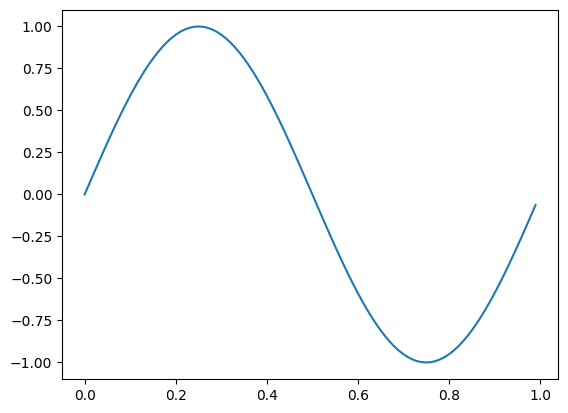

In [28]:
from src.datasets import sine_data

X, y = sine_data(n_samples=100)

plt.plot(X, y)

### Model

In [29]:
from src.layers import Linear
from src.losses import MeanSquaredError

X, y = sine_data(n_samples=1000)

dense1 = Dense(64, n_inputs=1)
activation1 = ReLU()
dense2 = Dense(64, n_inputs=64)
activation2 = ReLU()
dense3 = Dense(1, n_inputs=64)
activation3 = Linear()

loss_function = MeanSquaredError()

optimizer = Adam(learning_rate=0.005, decay=1e-3)

accuracy_precision = np.std(y) / 250

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)
    dense3.forward(activation2.outputs)
    activation3.forward(dense3.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation3.outputs)

    data_loss = loss_function.calculate(y_true=y, y_pred=activation3.outputs)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2) + loss_function.regularization_loss(dense3)
    loss = data_loss + regularization_loss

    predictions = activation3.outputs
    accuracy = np.mean(np.abs(predictions - y) < accuracy_precision)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, (data loss: {data_loss:.3f}, reg loss: {regularization_loss:.3f}), " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation3.outputs, y)
    activation3.backward(loss_function.dinputs)
    dense3.backward(activation3.dinputs)
    activation2.backward(dense3.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()



epoch: 0, acc: 0.002, loss: 0.511, (data loss: 0.511, reg loss: 0.000), lr: 0.005
epoch: 1000, acc: 0.502, loss: 0.000, (data loss: 0.000, reg loss: 0.000), lr: 0.0025012506253126563
epoch: 2000, acc: 0.819, loss: 0.000, (data loss: 0.000, reg loss: 0.000), lr: 0.0016672224074691564
epoch: 3000, acc: 0.841, loss: 0.000, (data loss: 0.000, reg loss: 0.000), lr: 0.001250312578144536
epoch: 4000, acc: 0.855, loss: 0.000, (data loss: 0.000, reg loss: 0.000), lr: 0.0010002000400080016
epoch: 5000, acc: 0.866, loss: 0.000, (data loss: 0.000, reg loss: 0.000), lr: 0.0008334722453742291
epoch: 6000, acc: 0.880, loss: 0.000, (data loss: 0.000, reg loss: 0.000), lr: 0.000714387769681383
epoch: 7000, acc: 0.883, loss: 0.000, (data loss: 0.000, reg loss: 0.000), lr: 0.0006250781347668458
epoch: 8000, acc: 0.888, loss: 0.000, (data loss: 0.000, reg loss: 0.000), lr: 0.00055561729081009
epoch: 9000, acc: 0.890, loss: 0.000, (data loss: 0.000, reg loss: 0.000), lr: 0.0005000500050005
epoch: 10000, ac

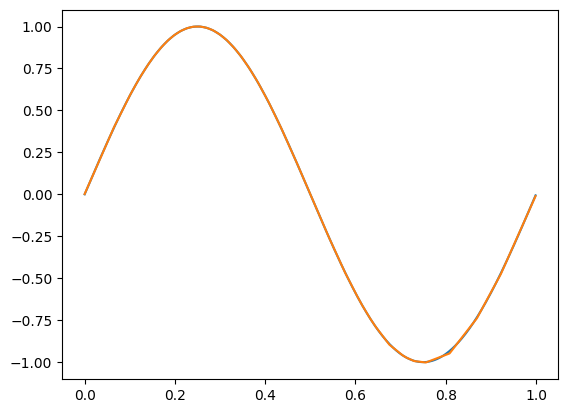

In [30]:
X_test, y_test = sine_data(n_samples=1000)

dense1.forward(X_test)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)
dense3.forward(activation2.outputs)
activation3.forward(dense3.outputs)

plt.plot(X_test, y_test)
plt.plot(X_test, activation3.outputs)